## Reading in the data

In [2]:
import pandas as pd
import numpy as np
from typing import Final  # For type annotations

raw_data: Final['pd.DataFrame'] = pd.read_csv('./auto-mpg.csv')


# Exercise 1

/var/folders/n9/fnc__vj96pbc8hshz5gbdl7r0000gn/T/ipykernel_60549/2704827525.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation.style.set_precision(3).background_gradient(


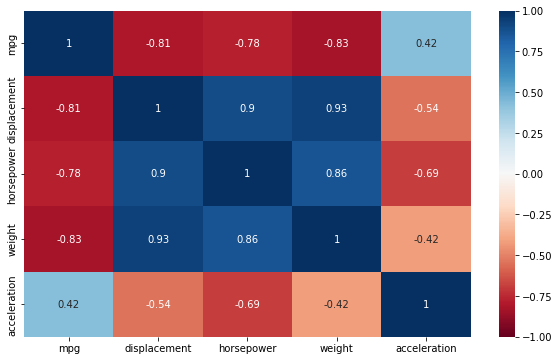

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

# Source: Discussion
numerical_data = raw_data.drop(columns=['origin'], inplace=False)
correlation = numerical_data.corr()
correlation.style.set_precision(3).background_gradient(
    cmap='RdBu', vmin=-1, vmax=1)

plt.figure(figsize=(10, 6))
_ = sns.heatmap(correlation, vmin=-1, vmax=1,
                center=0, annot=True, cmap='RdBu')


## Q1.1
The attribute with the least amount of correlation (absolute value is closest to 0) is acceleration. Therefore it will be the unlikely attribute.

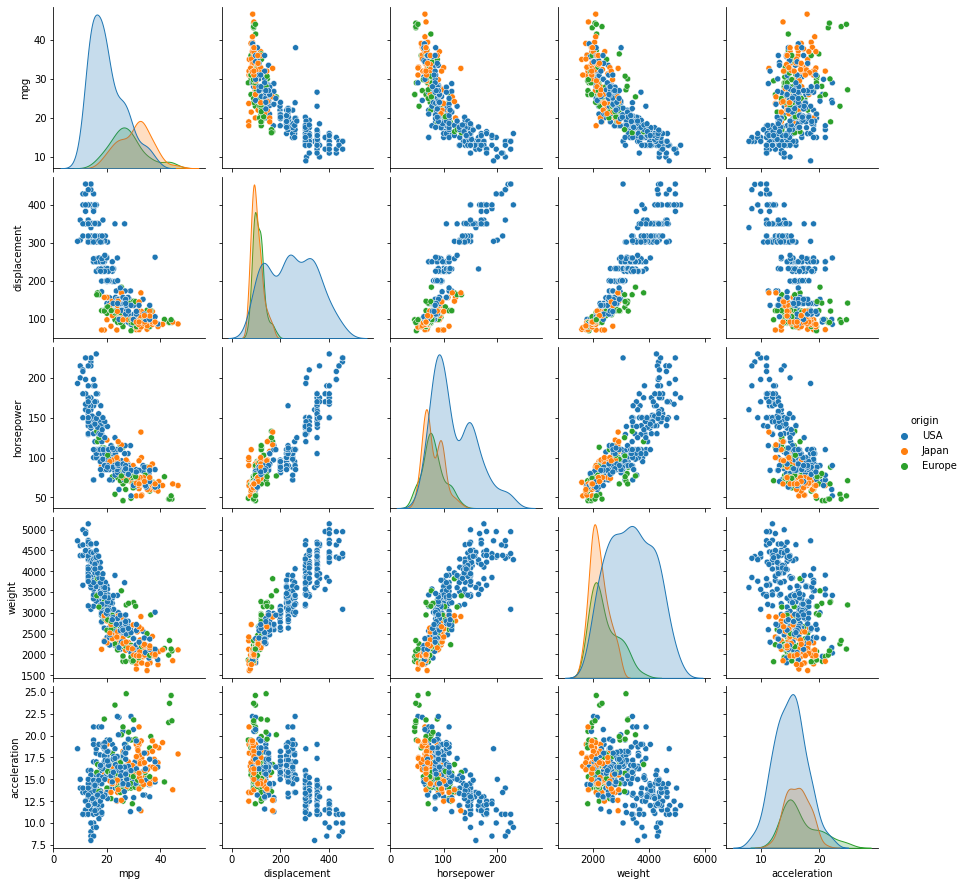

In [4]:
# Q1.2
sns.pairplot(data=raw_data,
             hue='origin', # use origin as color labels
             # Variables within data to use
             vars=['mpg', 'displacement', 'horsepower',
                   'weight', 'acceleration'],
             diag_kind='kde'
             )


## Q1.2
A polynomial regression could lead to the best result because the horsepower(x-axis) vs. mpg (y-axis) plot shows an almost quadratic trend.

# Exercise 2

In [5]:
# Q2.1 & Q2.2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


train, test = train_test_split(
    raw_data, test_size=0.2, random_state=0)  # Splitting the data

# X is an array of array of attributes
X_train, X_test = train.horsepower, test.horsepower
y_train, y_test = train.mpg, test.mpg

linearRegressor = LinearRegression()
regressionModel = linearRegressor.fit(
    X=np.asarray(X_train).reshape(-1, 1), y=y_train)
test_predictions = regressionModel.predict(X=np.asarray(X_test).reshape(-1, 1))

print("Mean Squared Error is: %2.f" %
      mean_squared_error(test_predictions, y_test))


Mean Squared Error is: 22


In [6]:
# Q2.3

from sklearn.preprocessing import PolynomialFeatures


def runPolynomialRegression(X: 'np.ndarray', y: 'np.ndarray', deg=3):
    # accesssor to polynomial library functions
    poly = PolynomialFeatures(degree=deg, include_bias=False)

    X_train, X_test = train_test_split(X, test_size=0.2, random_state=21)
    y_train, y_test = train_test_split(y, test_size=0.2, random_state=21)

    # Converts to a matrix of x, x^2, x^3, etc.
    # Convert both training and testing set to matrices
    X_train_matrix = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_matrix = poly.fit_transform(X_test.reshape(-1, 1))

    # Linear regression on the new matrix
    # treat x, x^2.. as a list of independent vairables
    polyRegModel: 'LinearRegression' = LinearRegression().fit(
        X_train_matrix, y_train.reshape(-1, 1))

    y_test_predictions = polyRegModel.predict(X=np.asarray(X_test_matrix))
    y_train_predictions = polyRegModel.predict(X=np.asarray(X_train_matrix))

    print(
        f'Test MSE of degree {deg} is {mean_squared_error(y_test_predictions, y_test):.4f}, r^2 is {r2_score(y_true=y_test, y_pred=y_test_predictions):.4f}')
    print(
        f'Train MSE of degree {deg} is {mean_squared_error(y_train_predictions, y_train):.4f}, r^2 is {r2_score(y_true=y_train, y_pred=y_train_predictions):.4f}\n')


X = np.asarray(raw_data.horsepower)
y = np.asarray(raw_data.mpg)

runPolynomialRegression(X, y, deg=2)
runPolynomialRegression(X, y, deg=3)
runPolynomialRegression(X, y, deg=4)

Test MSE of degree 2 is 16.9105, r^2 is 0.7146
Train MSE of degree 2 is 19.5135, r^2 is 0.6807

Test MSE of degree 3 is 16.9881, r^2 is 0.7132
Train MSE of degree 3 is 19.4490, r^2 is 0.6817

Test MSE of degree 4 is 17.1036, r^2 is 0.7113
Train MSE of degree 4 is 19.3437, r^2 is 0.6835



## Q2.3

No, I don't think there's a sign of overfitting. Neither is the training MSE approaching 0 nor is the $r^2$ approaching 1.0. If we have a overfitted model, we would see a big difference between training MSE and testing MSE.

## Exercise 3

In [7]:
# Q3.1 splitting the data
raw_data_onlyUSAndJP: Final['pd.Series'] = raw_data[raw_data.origin != 'Europe']

train, test = train_test_split(
    raw_data_onlyUSAndJP, test_size=0.2, random_state=21)

train_X = np.asarray(train.drop(columns='origin'))
train_y = np.asarray(train.origin).reshape(-1, 1)
test_X = np.asarray(test.drop(columns='origin'))
test_y = np.asarray(test.origin).reshape(-1, 1)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegressor = LogisticRegression()
logisticModel = logisticRegressor.fit(train_X, train_y)
logistic_y_predictions = logisticModel.predict(test_X)

print(classification_report(test_y, logistic_y_predictions))

              precision    recall  f1-score   support

       Japan       0.81      0.62      0.70        21
         USA       0.84      0.93      0.88        44

    accuracy                           0.83        65
   macro avg       0.82      0.78      0.79        65
weighted avg       0.83      0.83      0.82        65



/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Q3.2
My prediction is that the model will perform worse. According to the pair plot, we can see a clear distinction between American cars and Japanese cars beacuase they are not clustered together. But the points of European cars and Japanese cars are barely distinguishable in terms of position.